In [7]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

The following code implements a **3 layer Neural Network** from Scratch. The network consists of an input layer with 2 neurons, a hidden layer with 'n' neurons and an output layer with 2 neurons.
The **activation function** used for the hidden layer is the non linear activation function, **tanh**. The activation function for the output layer is **softmax**, which outputs probabilities.
The choice for loss function is the **cross-entropy loss**.

In [6]:
class customNeuralNetwork():

  def __init__(self, X, Y, learning_rate, lambdaa):
    self.X = X
    self.Y = Y
    self.rate = learning_rate
    self.lambdaa = lambdaa
    self.n, self.features = self.X.shape
    self.classes = len(np.unique(self.Y))

  
  def initialize_weights(self, nodes):
    #Initializing parameters w1,b1 for the hudden layer and w2,b2 for the output layer.
    np.random.seed(7)
    w1 = np.random.randn(self.features, nodes) / np.sqrt(self.features)
    b1 = np.zeros((1, nodes))
    w2 = np.random.randn(nodes, self.classes) / np.sqrt(nodes)
    b2 = np.zeros((1, self.classes))

    return w1, b1, w2, b2

  def forward_prop(self, trainableParameters):

    w1 = trainableParameters["w1"]
    b1 = trainableParameters["b1"]
    w2 = trainableParameters["w2"] 
    b2 = trainableParameters["b2"]

    #Implementing forward propagation through the hidden layer and applying the activation function
    z1 = np.dot(self.X, w1) + b1 
    a1 = np.tanh(z1)

    #Implementing forward propagation through the output layer and applying the activation function
    #Sigmoid(xi) = e^(xi) / summation(e^(xi))
    z2 = np.dot(a1, w2) + b2
    score = np.exp(z2)
    output = score / np.sum(score, axis=1, keepdims=True)

    #Caching the forward pass computations
    fw_pass = {"X": X, "output": output, "a1": a1}

    return output, fw_pass

  def calculate_loss(self, trainableParameters, output):

    w1,w2,b1,b2 = trainableParameters["w1"], trainableParameters["w2"], trainableParameters["b1"], trainableParameters["b2"]
    
    #Implementing cross entropy loss (negative log likelihood)
    log_output = -np.log(output[range(self.n), self.Y])
    temp_loss = np.sum(log_output)

    # Adding regulatization term (lambda) to loss 
    temp_loss += self.lambdaa/2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
    return temp_loss * 1./self.n

  def back_prop(self, trainableParameters, fw_pass):

    w1,b1,w2,b2 = trainableParameters["w1"], trainableParameters["b1"], trainableParameters["w2"], trainableParameters["b2"]
    
    #Obtaining forward pass computations
    X = fw_pass["X"]
    a1 = fw_pass["a1"]
    output = fw_pass["output"]

    #Backpropagating through output layer
    dz2 = output
    dz2[range(self.n), self.Y] -= 1

    dw2 = np.dot(a1.T, dz2) + self.lambdaa * w2
    db2 = np.sum(dz2, axis=0, keepdims=True)
        
    dz1 = np.dot(dz2, w2.T) * (1 - np.power(a1, 2))
    #Backpropagating through hidden layer   
    dw1 = np.dot(X.T, dz1) + self.lambdaa * w1
    db1 = np.sum(dz1, axis=0)

    #Updating the parameters (Gradient Descent)
    w1 += -self.rate * dw1
    b1 += -self.rate * db1
    w2 += -self.rate * dw2
    b2 += -self.rate * db2
    
    trainableParameters = {"w1": w1, "w2": w2, "b1": b1, "b2": b2}

    return trainableParameters
    
  def predict(self, X):
    epochs = 20000
        
    w1, b1, w2, b2 = self.initialize_weights(4)
    trainableParameters = {"w1": w1, "w2": w2, "b1": b1, "b2": b2}

    for i in range(epochs):
      output, fw_pass = self.forward_prop(trainableParameters)
      loss = self.calculate_loss(trainableParameters, output)

      if i % 1000 == 0:
          print (f"Loss at iteration {i} : {loss}")
      
      trainableParameters = self.back_prop(trainableParameters, fw_pass)

    return trainableParameters



  


Loss at iteration 0 : 0.9377278655315742
Loss at iteration 1000 : 0.30276732733547784
Loss at iteration 2000 : 0.3007398357039899
Loss at iteration 3000 : 0.2980882842147873
Loss at iteration 4000 : 0.11189243861787673
Loss at iteration 5000 : 0.07727437969122865
Loss at iteration 6000 : 0.07073612658240541
Loss at iteration 7000 : 0.06802510494037035
Loss at iteration 8000 : 0.06636026342968468
Loss at iteration 9000 : 0.06504276511078666
Loss at iteration 10000 : 0.0637540950433475
Loss at iteration 11000 : 0.06230011017584434
Loss at iteration 12000 : 0.06063444508275549
Loss at iteration 13000 : 0.05874808486426891
Loss at iteration 14000 : 0.05676540620910267
Loss at iteration 15000 : 0.05487072730324326
Loss at iteration 16000 : 0.05315653388895773
Loss at iteration 17000 : 0.05164133647967176
Loss at iteration 18000 : 0.05031575379545512
Loss at iteration 19000 : 0.049160120829039616


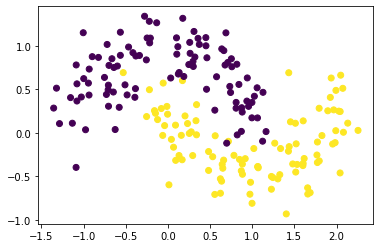

In [8]:
#Generating data using the make moons dataset in sklearn
np.random.seed(0)
X, Y = datasets.make_moons(200, noise=0.20)
#Visualizing the data
plt.scatter(X[:,0], X[:,1], c=Y)

model = customNeuralNetwork(X, y, 0.001, 1e-3)
trained_parameters = model.predict(X)


w2 = trained_parameters["w2"]
w1 = trained_parameters["w1"]
b2 = trained_parameters["b2"]
b1 = trained_parameters["b1"]


